# Unsupervised Learning
This notebook contains examples and code explainig unsupervised learning.
The code is based on several examples from the internet - credits at the end of the notebook.

<font color=blue><h3><center>Summary</center></h3>
Open “Module 9 - Unsupervised Learning.ipynb”     <b>Part 1</b> [Done]
<br>Run the K-means algorithm (from scratch) <b>Part 2</b> [Done below]
<br>Experiment with different values of K <b>Part 3</b> [see Part 3 solution below]
<br>Run the example that uses the function from Scikit-learn <b>Part 4</b> [Done]
<br>Compare the centroids from the “scratch” with the one by Scikit-learn <b>Part 5</b> [See "Part 5 solution" below]
<br>Run the clustering by changing the linkage type: <b>Part 6</b> [See "Part 6 Solution" below]
<pre>Single
Complete
Average</pre>
    
<br>Compare how the clustering results change.. <b>Part 7</b> [See "Part 7 Solution" below]

## K-means clustering algorithm

### K-means from scratch..

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv("../data/xclara.csv")
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


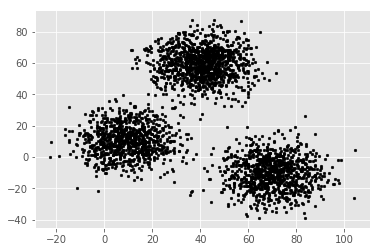

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[65. 79.]
 [49. 44.]
 [83. 23.]]


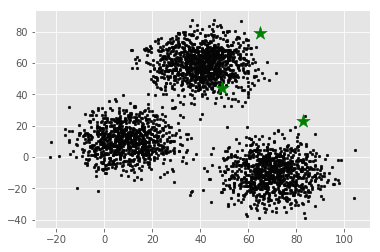

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [11]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2257: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


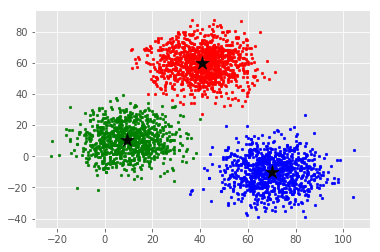

In [12]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [13]:
print(C)

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]


### By using ScikitLearn

In [14]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [15]:
# Compare the previously obtained centroids from scikit-learn centroids
print(C) # From Scratch

print('\n')

print(centroids) # From sci-kit learn

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]


[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


<h2><font color=blue>Part 3 Solution

<font color= blue>We are going to experiment iteratively with multiple numbers of k

Centroids with  1 as k are 
[[40.61135842 22.86214103]]

Centroids with  2 as k are 
[[ 26.97904841  38.42510047]
 [ 69.49144971 -10.10803707]]

Centroids with  3 as k are 
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]

Centroids with  4 as k are 
[[ 48.13812376  58.99917559]
 [  9.45577774  10.66209744]
 [ 69.92418447 -10.11964119]
 [ 31.88077701  60.50808862]]

Centroids with  5 as k are 
[[ 75.86750535  -5.10938758]
 [ 32.29663679  58.82056953]
 [  9.3823541   10.62887471]
 [ 63.09406843 -15.79525602]
 [ 48.50263517  60.41556586]]

Centroids with  6 as k are 
[[ 63.64247569  -5.86106381]
 [ 31.67960468  60.24178194]
 [ 77.4855006  -15.24570657]
 [  1.555897     7.35029608]
 [ 16.85880981  13.82971573]
 [ 48.03326429  59.37952502]]



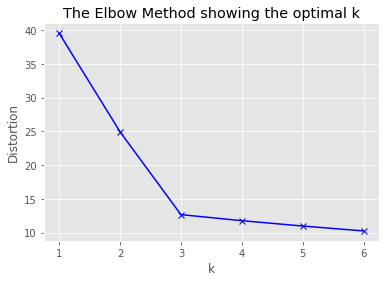

In [16]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,7)
for k in K:
    # Number of clusters
    kmeans = KMeans(n_clusters=k)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    centroids = kmeans.cluster_centers_
    print("Centroids with ",k,"as k are ")
    print(centroids)
    print('')
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<font color=blue>So here we prove that taking three clusters is the best compromise between explainability (less number of clusters) and inter-cluster similarity

<h2><font color=blue>Part 5 Solution

<font color=blue>Comparing programmatic calculation with sklearn centroids

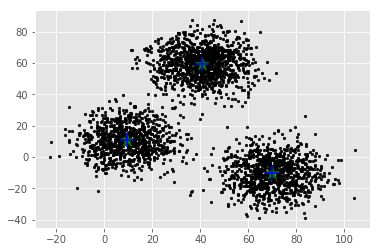

In [43]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='black', s=7)
#plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.scatter(C[:, 0], C[:, 1], marker='*', c='g',s=200)
#Centroids from sklearn
centroid = np.array([[  9.4780459,10.686052  ],
 [ 40.68362784 , 59.71589274],
 [ 69.92418447, -10.11964119]])
plt.scatter(centroid[:, 0], centroid[:, 1], marker='+', c='b',s=200)

<font color=blue>As you can see, both programmatic and sklearn converged to almost same centroids proving validity of both approaches in our case.

# Hierarchical Cluster Analysis

## 1. Sample clustering using scipy

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, single, average, complete

<h2><font color=blue>Part 6 Solution

<h3><font color=blue>Using Single Linkege

In [55]:
data = np.genfromtxt("../data/ExpRawData-E-TABM-84-A-AFFY-44.tab",names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")

data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

data_dist = pdist(data_array) # computing the distance
#data_link = linkage(data_dist) # computing the linkage
data_link = single(data_dist)


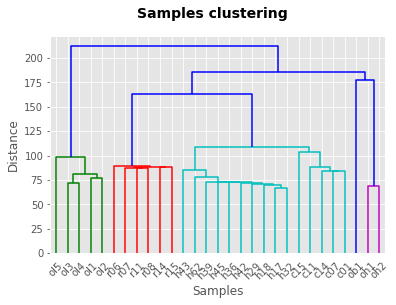

In [56]:
dendrogram(data_link,labels=data.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

<h3><font color=blue>Using Complete Linkege

In [53]:
data = np.genfromtxt("../data/ExpRawData-E-TABM-84-A-AFFY-44.tab",names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")

data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

data_dist = pdist(data_array) # computing the distance
#data_link = linkage(data_dist) # computing the linkage
data_link = complete(data_dist)


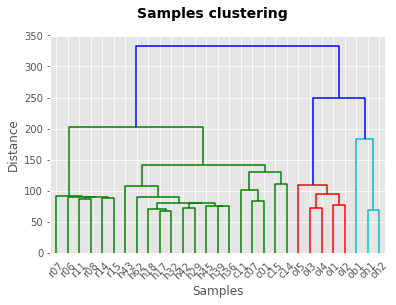

In [54]:
dendrogram(data_link,labels=data.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

<h3><font color=blue>Using Average Linkege

In [51]:
data = np.genfromtxt("../data/ExpRawData-E-TABM-84-A-AFFY-44.tab",names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")

data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

data_dist = pdist(data_array) # computing the distance
#data_link = linkage(data_dist) # computing the linkage
data_link = average(data_dist)


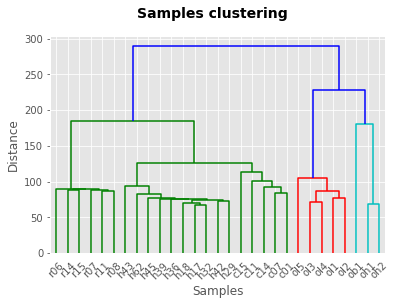

In [52]:
dendrogram(data_link,labels=data.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

<h2><font color=blue>Part 7 Solution

<font color=blue>Each linkege approaches have different results with complete and average having closer results than single linkege.

#### Credits:
- https://github.com/oxananu/hclust-python
- https://github.com/mubaris/friendly-fortnight
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html